In [5]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 798 (delta 37), reused 51 (delta 20), pack-reused 726
Receiving objects: 100% (798/798), 49.82 MiB | 10.18 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [6]:
%cd cytounet

/kaggle/working/cytounet


In [7]:
! ls cytounet

__init__.py  augmentation.py  data.py  model.py


In [8]:
from cytounet.model import *
from cytounet.data import *
from cytounet.augmentation import *

In [9]:
!  ls examples/BBBC003_v1/

images	truth


In [10]:
data_generator_args =  dict(rotation_range=0.05,
                      rescale = 1./255,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [11]:
! if [ ! -d "aug" ]; then mkdir aug;fi

In [12]:
train_gen = generate_train_data(15, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 1, target_size = (256, 256), save_to_dir="aug")

In [13]:
for i, batch in enumerate(train_gen):
  if i>= 15:
    break

Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.


In [14]:
! if [ ! -d "aug/images" ]; then echo "Making directory" && mkdir aug/images aug/masks; else ls aug/images;fi

Making directory


In [15]:
! mv aug/image_* aug/images && mv aug/mask_* aug/masks && ls aug/masks | wc -l

240


In [16]:
images, masks = load_augmentations("aug/images","aug/masks")

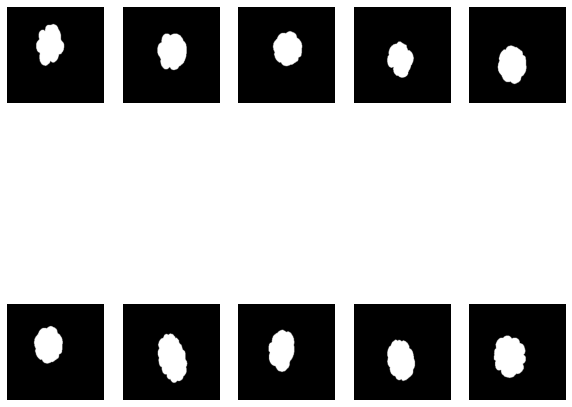

In [17]:
show_images(masks, number=10)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
model = unet(input_size = (256, 256, 1), optimiser="Adam",metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-3)

In [21]:
history = model.fit_generator(train_gen, steps_per_epoch= 100, epochs=5, callbacks = [EarlyStopping(patience = 2, monitor='loss', verbose=1)])

Epoch 1/5
100/100 [==============================] - 62s 623ms/step - loss: 0.1387 - accuracy: 0.9456
Epoch 2/5
100/100 [==============================] - 61s 608ms/step - loss: 0.0316 - accuracy: 0.9871
Epoch 3/5
100/100 [==============================] - 60s 603ms/step - loss: 0.0161 - accuracy: 0.9920
Epoch 4/5
100/100 [==============================] - 60s 603ms/step - loss: 0.0192 - accuracy: 0.9910
Epoch 5/5
100/100 [==============================] - 60s 602ms/step - loss: 0.0096 - accuracy: 0.9929


In [22]:
test_images = generate_test_data("aug/images",15, image_suffix="png")

In [23]:
model.save("unet_embryo.hdf5")

In [24]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [25]:
results = model.predict_generator(test_images, 10, verbose=1)

10/10 [==============================] - 0s 17ms/step


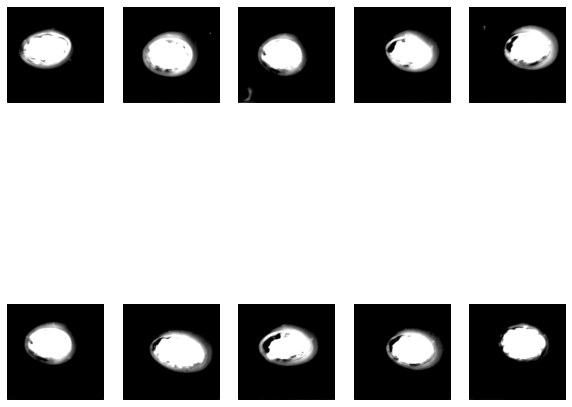

In [26]:
show_images(results, number = 10)